In [31]:
import numpy as np
%matplotlib inline

import importlib
import sys
import pickle
from RodeoMethods import *
importlib.reload(sys.modules['RodeoMethods'])
from OutdatedMethods import search_spectrum, process_data
from qiskit import IBMQ
from qiskit.circuit import QuantumCircuit
from qiskit.compiler import transpile
import pandas as pd
import itertools

import random


ibmqfactory.load_account:WARNING:2022-08-02 23:35:23,559: Credentials are already in use. The existing account in the session will be replaced.


In [32]:
df = pd.read_excel("C:/Users/Max/Documents/RSI Project/Quantum Computer Implementation/2 Qubit Data.xlsx", sheet_name=[0, 1, 2], header=0, index_col=None, usecols=[0, 1, 3, 4, 6, 7, 9, 10], nrows=22, dtype=np.float64)
quantinuum = []
perth3 = []
perth5 = []
# print(df[0],"\n", df[1],"\n", df[2])
energyColName = "Energies{suffix}"
countsColName = "Counts{suffix}"

for scan, dataSource in zip(df, [quantinuum, perth3, perth5]):
    for i in range(4):
        if i == 0:
            energyHeader = energyColName.format(suffix="")
            countsHeader = countsColName.format(suffix="")
        else:
            energyHeader = energyColName.format(suffix=".{num}".format(num=i))
            countsHeader = countsColName.format(suffix=".{num}".format(num=i))
        dataSource.append(dict(zip(df[scan][energyHeader].tolist(), df[scan][countsHeader].tolist())))

In [72]:
def get_nearest_elements(dualDict, sides, cycles):
    center = find_single_peak(list(dualDict.keys()), list(dualDict.values()), list(dualDict.keys())[10], 1024*pow(2, -cycles), 5, printResults=False)[0]
    print(center)
    keys = list(dualDict.keys())
    modeIndex = closest_index(list(dualDict.keys()), center)
    print(modeIndex)
    rtnKeys = keys[(modeIndex - sides):(modeIndex + sides)]
    rtnDict = dict()
    for key in rtnKeys:
        rtnDict[key] = dualDict[key]
    return rtnDict
print(quantinuum[0])
print(get_nearest_elements(quantinuum[0], 3, 5))

def get_uncertainties(counts, n):
    uncertainties = list()
    for count in counts:
        frac = count/n
        uncertainties.append(pow((frac * (1-frac))/n, 0.5) * n)
    return uncertainties

def make_noisy(counts, uncertainties):
    noisyCounts = list()
    for count, error in zip(counts, uncertainties):
        noisyCounts.append(count + random.normalvariate(0, error))
    return noisyCounts

{-4.125: 13.0, -4.11309523809523: 9.0, -4.10119047619047: 11.0, -4.08928571428571: 8.0, -4.07738095238095: 1.0, -4.06547619047619: 12.0, -4.05357142857142: 38.0, -4.04166666666666: 26.0, -4.0297619047619: 100.0, -4.01785714285714: 158.0, -4.00595238095238: 248.0, -3.99404761904761: 253.0, -3.98214285714285: 221.0, -3.97023809523809: 86.0, -3.95833333333333: 68.0, -3.94642857142857: 10.0, -3.9345238095238: 12.0, -3.92261904761904: 60.0, -3.91071428571428: 2.0, -3.89880952380952: 38.0, -3.88690476190476: 7.0, -3.875: 6.0}
-3.997883738759228
11
{-4.0297619047619: 100.0, -4.01785714285714: 158.0, -4.00595238095238: 248.0, -3.99404761904761: 253.0, -3.98214285714285: 221.0, -3.97023809523809: 86.0}


In [ ]:
dataSet = quantinuum
cycles = 5
outlierThreshold = 1

allDeltas = list()
for data, exact in zip(dataSet, [-4, -1, 1, 4]):
    fullFit = find_single_peak(list(data.keys()), list(data.values()), exact, 1024*pow(2, -cycles), 12, printResults=False)
    deltas = [abs(actual - expected) for actual, expected in zip(list(data.values()), fullFit[3])]
    allDeltas.append(deltas)
    print(deltas)
    print(np.average(deltas), np.std(deltas))

outlierIndices = list()
for deltaSet in allDeltas:
    std = np.std(deltaSet)
    mean = np.mean(deltaSet)
    indices = list()
    for index, delta in enumerate(deltaSet):
        if (delta - mean - std*outlierThreshold) > 0:
            indices.append(index)
    print(indices)
    outlierIndices.append(indices)

# print(outlierIndices)

In [ ]:
random.seed(a=1651464000)

centersInfo = list()
centers = list()

maxRand = 0
for i in range(1):
    endDrop = random.randint(0, maxRand)
    startDrop = random.randint(0, maxRand)
    randomDrop = random.randint(0, maxRand)
    trimmedList = dict(itertools.islice(dataSet[0].items(), startDrop, 22-endDrop))
    sampled = dict(random.sample(list(trimmedList.items()), len(trimmedList) - randomDrop))
    # print(sampled)
    results = find_single_peak(list(sampled.keys()), list(sampled.values()), -4, 1024*pow(2, -cycles), 12, printResults=True)
    centersInfo.append([endDrop, startDrop, results[0]])
    centers.append(results[0])
    print(results)
print(centers)
print(np.average(centers), np.std(centers))

In [71]:
print(centersInfo)

[[6, 2, -3.9977382424664434], [5, 0, -3.99774582971508], [4, 6, -3.997750232335008], [3, 5, -3.99774521108816], [1, 9, -3.997395413752194], [4, 2, -3.9977440307170946], [4, 7, -3.9977429289519515], [9, 1, -3.996151545185863], [7, 0, -3.9976570516660477], [9, 0, -3.996151545185863], [2, 2, -3.997744323562388], [10, 6, -3.999108442348111], [6, 9, -3.997393573315903], [2, 7, -3.997743213720593], [8, 7, -3.9978109918583042], [6, 2, -3.9977382424664434], [2, 4, -3.997744106845071], [3, 0, -3.997744323562388], [1, 1, -3.997744323562388], [6, 7, -3.9977353980385937], [7, 0, -3.9976570516660477], [3, 2, -3.997744323562388], [7, 1, -3.9976570516660477], [0, 2, -3.997744323562388], [7, 3, -3.997657227797127], [0, 2, -3.997744323562388], [4, 5, -3.997744863324941], [5, 7, -3.997744253334744], [5, 10, -3.9970123607866244], [0, 6, -3.99775023348928]]


In [102]:
random.seed(a=1651464000)

quantinuumCenter = list()
perth3Center = list()
perth5Center = list()
for cycles, dataSource, centeredData in zip([5, 3, 5], [quantinuum, perth3, perth5], [quantinuumCenter, perth3Center, perth5Center]):
    for passData, guess in zip(dataSource, [-4, -1, 1, 4]):
        closeElements = get_nearest_elements(passData, 4, cycles)
        centeredData.append([closeElements, get_uncertainties(list(closeElements.values()), 1024)])

print(quantinuum[1])
for i in quantinuumCenter:
    print(i)

-3.997883738759228
11
-1.010053713353513
10
1.0038181951519822
11
4.00326432058606
11
-3.9952034180499645
7
-0.9839189825995546
16
1.0024155117406122
7
4.010415451010814
12
-4.000642929186808
10
-0.9938775909813049
11
1.001077533333445
11
3.9996236909961747
10
{-1.125: 30.0, -1.11309523809523: 10.0, -1.10119047619047: 1.0, -1.08928571428571: 135.0, -1.07738095238095: 14.0, -1.06547619047619: 4.0, -1.05357142857142: 10.0, -1.04166666666666: 114.0, -1.0297619047619: 254.0, -1.01785714285714: 218.0, -1.00595238095238: 224.0, -0.994047619047619: 226.0, -0.982142857142857: 135.0, -0.970238095238095: 37.0, -0.958333333333333: 141.0, -0.946428571428571: 22.0, -0.934523809523809: 20.0, -0.922619047619047: 2.0, -0.910714285714285: 5.0, -0.898809523809523: 19.0, -0.886904761904761: 3.0, -0.875: 92.0}
[{-4.04166666666666: 26.0, -4.0297619047619: 100.0, -4.01785714285714: 158.0, -4.00595238095238: 248.0, -3.99404761904761: 253.0, -3.98214285714285: 221.0, -3.97023809523809: 86.0, -3.95833333333333

In [93]:
random.seed(a=1651464000)
trials = 100
guesses = [-4, -1, 1, 4]
centers = [[], [], [], []]
for i in range(trials):
    tempData = [0, 0]
    for index, passData in enumerate(quantinuumCenter):
        tempData[0] = list(passData[0].keys())
        tempData[1] = make_noisy(list(passData[0].values()), passData[1])
        # print(tempData)
        centers[index].append(find_single_peak(tempData[0], tempData[1], guesses[index], 32, 5, printResults=False)[0])

print(centers)

[[-3.997510325092948, -3.997280991884971, -3.9980080483941878, -3.998515110337623, -3.9967914775891984, -3.9980925439651953, -3.999562199213335, -3.9981495521826833, -3.9978229802920993, -3.9990224851942586, -3.9997055153936145, -3.997802147734636, -3.9975810055482524, -3.997400474545791, -3.999492654879935, -3.997389945141901, -3.9956836419491673, -3.9982482334617693, -3.999516580216265, -3.9979829611443956, -3.9972378639995707, -3.998394048089777, -3.9970499706807074, -3.9973767762646366, -3.9966635833739717, -4.000006942355118, -3.997770197213062, -3.9978773949339015, -3.9986851906392866, -3.9983304803523136, -3.998879550385861, -3.997892742538775, -3.998397408052216, -3.9984862886397163, -3.9978444785526706, -3.998867896134268, -3.9974182602745967, -3.997900085029065, -3.997785997745983, -3.9972767322788547, -3.998170313724316, -3.9990251296160544, -3.9992831304893803, -3.996618768168791, -3.9975349293370135, -3.998299031158341, -3.9987626179530134, -3.9981868151719278, -3.99844492

In [95]:
print(np.average(centers[0]), np.std(centers[0]))
print(np.average(centers[1]), np.std(centers[1]))
print(np.average(centers[2]), np.std(centers[2]))
print(np.average(centers[3]), np.std(centers[3]))

-3.9980152380091556 0.0009376399314705809
-1.0121127794106055 0.0012560026062845332
1.0052389041268865 0.0009391882242273832
4.004068920660865 0.0016374750932756914


In [99]:
print(list(quantinuumCenter[1][0].keys()))
print(list(quantinuumCenter[1][0].values()))
print(quantinuumCenter[1][1])

[-1.04166666666666, -1.0297619047619, -1.01785714285714, -1.00595238095238, -0.994047619047619, -0.982142857142857]
[114.0, 254.0, 218.0, 224.0, 226.0, 135.0]
[10.065217024485861, 13.82013363719758, 13.099230654889622, 13.228756555322953, 13.271062269087581, 10.825994108510313]


In [106]:
random.seed(a=1651464000)
trials = 10
guesses = [-4, -1, 1, 4]
centers = [[], [], [], []]
deviations = [[], [], [], []]
for i in range(trials):
    tempData = [0, 0]
    for index, passData in enumerate(quantinuumCenter):
        if index == 1:
            tempData[0] = list(passData[0].keys())
            tempData[1] = make_noisy(list(passData[0].values()), passData[1])
            # print(tempData)
            centers[index].append(find_single_peak(tempData[0], tempData[1], guesses[index], 32, 5, printResults=False)[0])
            deviations[index].append(find_single_peak(tempData[0], tempData[1], guesses[index], 32, 5, printResults=False)[1])
print(np.average(centers[1]), np.average(deviations[1]))

-1.0114785814623894 0.004232223411403529


[[Model]]
    (Model(constant) + Model(gaussian, prefix='peak0_'))
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 147
    # data points      = 22
    # variables        = 3
    chi-square         = 42125.5325
    reduced chi-square = 2217.13329
    Akaike info crit   = 172.262071
    Bayesian info crit = 175.535198
[[Variables]]
    c:                32 (fixed)
    peak0_amplitude:  14.0000000 +/- 1.4244e-04 (0.00%) (init = 25)
    peak0_center:    -1.01005353 +/- 0.00372236 (0.37%) (init = -1)
    peak0_sigma:      0.02406646 +/- 0.00301060 (12.51%) (init = 0.1)
    peak0_fwhm:       0.05667219 +/- 0.00708942 (12.51%) == '2.3548200*peak0_sigma'
    peak0_height:     232.073673 +/- 29.0313064 (12.51%) == '0.3989423*peak0_amplitude/max(1e-15, peak0_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(peak0_center, peak0_sigma) = 0.199


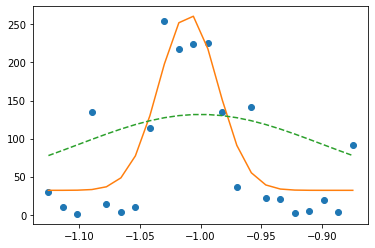

[-1.0100535301392362,
 0.0037223573932044,
 0.024066461915815657,
 array([ 32.0025824 ,  32.02426377,  32.17849446,  33.02807211,
         36.63612049,  48.36884977,  77.24951413, 129.93591538,
        197.95959368, 252.18871049, 260.72837395, 218.02758422,
        150.4586992 ,  91.05937975,  55.05383142,  39.04578934,
         33.6859648 ,  32.31586366,  32.04633222,  32.00532107,
         32.00047846,  32.00003368]),
 {'peak0_amplitude': 14.000000004470259,
  'peak0_center': -1.0100535301392362,
  'peak0_sigma': 0.024066461915815657,
  'c': 32}]

In [107]:
find_single_peak(list(quantinuum[1].keys()), list(quantinuum[1].values()), -1, 32, 5, printResults=True)